# Exploratory analysis

- tweets collected for ecuadorian users
- the tweet's field 'reply_to_status_id' link to the parent tweet in a conversation

In [2]:

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib


In [4]:
# download the dataset from using tweets ids or ask authors for the full dataset
ds = pd.read_csv('dataset/twconvcharact.csv',
                 usecols=['tweet_id','screen_name', 'in_reply_to_status_id', 'conversation_id'],
                dtype={'in_reply_to_status_id':str}
                )

In [56]:
num_tweets = ds.shape[0]
num_conversations = ds.conversation_id.nunique()

print(f'{num_tweets:,} tweets')
print(f'{num_conversations:,} conversations')

1,402,580 tweets
746,861 conversations


## Conversations distribution 

The conversations are grouped by number of replies to establish the distribution by number of tweets

In [57]:
convdist=ds.groupby('conversation_id').size().reset_index()
convdist.columns=['conversation_id','num_replies']
convdist.shape

(746861, 2)

show the percentage of **conversations** based on the number of **tweets**

In [49]:
def show_conversation_distribution_table(convdist):
    stat=convdist.groupby('num_replies').size()
    stat=stat.reset_index()
    stat.columns=['tweets','conversations']
    stat.tweets = stat.tweets.astype(int)
    total = stat.conversations.sum()
    tconv = stat[stat.tweets>1].conversations.sum()
    stat['perc'] = stat.conversations / total
    #stat['pconv'] = stat.conversations / tconv
    #stat.loc[0,'pconv'] = 0
    stat.sort_values('tweets', ascending=True, inplace=True)
    stat.reset_index(inplace=True, drop=True)
    stat= stat.head()
    return stat

show_conversation_distribution_table(convdist)

,tweets,conversations,perc
0,1,622130,0.832993
1,2,67578,0.090483
2,3,21590,0.028908
3,4,10494,0.014051
4,5,6088,0.008151


In [24]:
# original version of the dataset
#show_conversation_distribution_table()

,tweets,conversations,perc,pconv
0,1,1747374,0.643253,0.000000
1,2,401274,0.147719,0.414073
2,3,144078,0.053039,0.148673
3,4,86512,0.031847,0.089271
4,5,61935,0.022800,0.063910


In [26]:
conv = ds[ds.in_reply_to_status_id.isnull()]
conv.shape

(746862, 4)

In [35]:
def show_cdf_plot():
    fig = plt.figure(figsize=(12,5))
    convdist.num_replies.plot.hist(bins=100)
    plt.yscale('log')
    plt.xlabel('number of tweets')
    plt.ylabel('conversations')
    plt.legend().set_visible(False)
    plt.tight_layout()

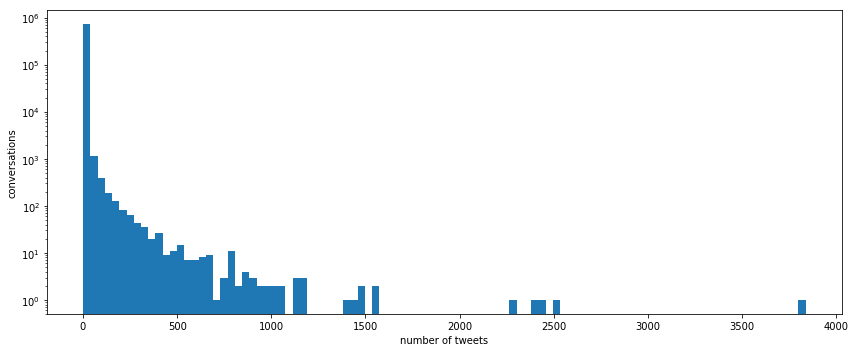

In [36]:
show_cdf_plot()

In [31]:
def plot_log_distribution():
    y, bins = np.histogram(convdist.num_replies, bins=1000)
    x=bins[:-1]
    ix = y!=0
    y_log = np.log(y[ix])
    x_log = np.log(x[ix])
    plt.scatter(x_log, y_log, marker='.')
    plt.xlabel('log conversations length')
    plt.ylabel('log frequency')
    plt.savefig('results/conversations_distribution.eps', format='eps',bbox_inches='tight')

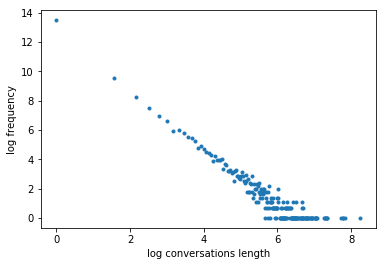

In [32]:
plot_log_distribution()

## conversation definition
- conversation should have at least one reply from another user

In [33]:
ds2 = ds.merge(convdist, on='conversation_id')
ds2.shape

(1402580, 5)

In [43]:
def conversation_filter(ds):
    print('extract conversations with 2 or more tweets')
    conv = ds[(ds.num_replies>1)]
    print(f'num conversatins with 2 or more tweets: {conv.shape[0]}')
    gconv = conv.groupby('conversation_id').agg({'screen_name': 'nunique', 'tweet_id': 'count'})
    gconv = gconv.reset_index()
    gconv.rename(columns={'screen_name': 'num_users', 'tweet_id': 'num_tweets'}, inplace=True)
    conv = conv.merge(gconv, on='conversation_id')
    conv=conv[(conv.num_users>1)]
    print(f'num conversatins with 2 or more users: {conv.shape[0]}')
    return conv

In [51]:
conv_tweets = conversation_filter(ds2)
convdist=conv_tweets.groupby('conversation_id').size().reset_index()
convdist.columns=['conversation_id','num_replies']
convdist.shape

extract conversations with 2 or more tweets
num conversatins with 2 or more tweets: 780450
num conversatins with 2 or more users: 763484


(118846, 2)

In [52]:
show_conversation_distribution_table(convdist)

,tweets,conversations,perc
0,2,62897,0.529231
1,3,21131,0.177802
2,4,10313,0.086776
3,5,5874,0.049425
4,6,3606,0.030342


In [15]:
# original version of the dataset
#show_conversation_distribution_table()

,tweets,conversations,perc,pconv
0,2,367870,0.402316,
1,3,139107,0.152132,0.152132
2,4,84224,0.092110,0.0921104
3,5,58395,0.063863,0.0638629
4,6,39258,0.042934,0.042934
